In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave
import cv2
import pandas as pd
import seaborn as sns
import os
from os import listdir 

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, ConfusionMatrixDisplay,confusion_matrix

import joblib

## Modelo final

Para comenzar, se importa el modelo final, el cual esta guardado en la carpeta "modelos" con el nombre "modelo_final.sav".

In [2]:
carpeta = "modelos/"

modelo_final = joblib.load(carpeta+"modelo_final.sav") # Cargamos el modelo con la libreria "joblib"

Para probar el desempeño del modelo se usara la subconjunto 2018, el cual es una versión más limpia (menor cantidad de casos patologicos) de los conjuntos de entrenamiento y validación. Lo que hace la siguiente celda es elegir una imagen al azar y muestra si la lesión correspondiente es maligna o benigna.

La imagen escogida es: ISIC_0010175
La contiene una lesión es: Maligno


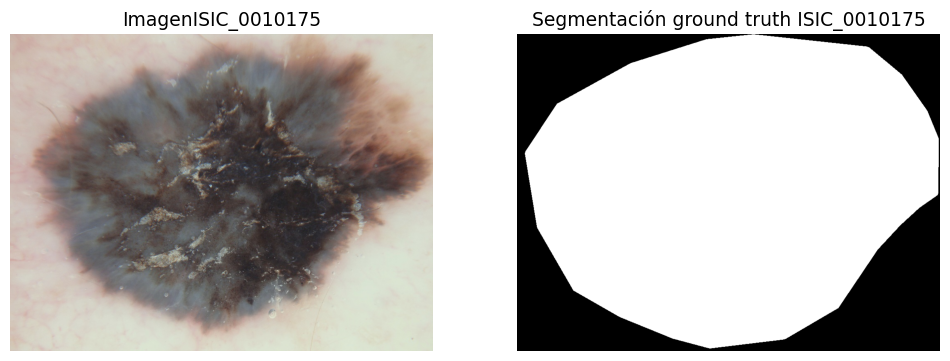

In [3]:
img_dir = "Subconjunto_2018/images/"
mask_dir = "Subconjunto_2018/masks/"
csv_dir = "Subconjunto_2018/"

files = os.listdir(img_dir)
i = np.random.randint(0,len(files)) # Tomo un entero al azar

img_name = files[i] # Dado dicho entero, elijo una imagen al azar

img = imread(img_dir+img_name) # Leo la imagen
img_seg_true = imread(mask_dir+img_name[:-4]+'_Segmentation.png')

img_labels_csv = pd.read_csv(csv_dir+"list.csv",header=None)
img_label = img_labels_csv[img_labels_csv[0]==img_name[:-4]][1].values

if img_label==0:
    img_tipo = 'Benigno'
else:
    img_tipo = 'Maligno'

# Mostramos la imagen elejida junto a su segmentación, ademas se imprime su nombre y si es maligna o no.
print('La imagen escogida es: '+img_name[:-4])
print('La contiene una lesión es: '+img_tipo)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Imagen'+img_name[:-4], fontsize=13.5)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Segmentación ground truth '+img_name[:-4], fontsize=13.5)
plt.imshow(img_seg_true, cmap='gray')
plt.axis('off')
plt.show()

Para realizar la predicción, necesitamos las caracteristicas asociadas a la imagen. En la siguiente celda importamos dicho csv y leemos la fila correspondiente a la imagen.

In [4]:
carac_csv = pd.read_csv("features/features_subconjunto_2018_nuestra_segmentacion_mask.csv")

img_carac = carac_csv[carac_csv['image_id']==img_name[:-4]].iloc[:,2:]

Finalmente, realizamos la predicción.

In [5]:
th = 0.187 # Umbral definido

y_pred_prob = modelo_final.predict_proba(img_carac)[:,1] # Realizo la prediccion usando probabilidades

# Si la probabilidad es menor o mayor al umbra, le asigno 0 o 1
if y_pred_prob<=th:
    y_pred = 0
else:
    y_pred = 1

# Cambio 0 --> Benigno y 1 --> Maligno
if y_pred==0:
    pred_name = 'Benigno.'
else:
    pred_name = 'Maligno.'

if y_pred==img_label:
    correcto = 'correcta.'
else:
    correcto = 'incorrecta.'

print('La predicción del modelo es:',pred_name)
print('La cual es '+correcto)

La predicción del modelo es: Maligno.
La cual es correcta.


## Modelo de referencia

Al igual que antes, comenzamos cargando el modelo.

In [6]:
carpeta = "modelos/"

modelo_referencia = joblib.load(carpeta+"modelo_referencia.sav") # Cargamos el modelo con la libreria "joblib"

Elegimos una imagen al azar.

La imagen escogida es: ISIC_0009891
La contiene una lesión es: Benigno


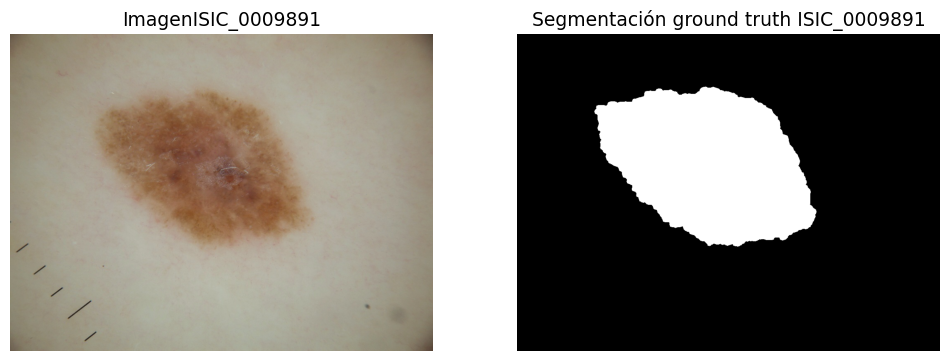

In [16]:
img_dir = "Subconjunto_2018/images/"
mask_dir = "Subconjunto_2018/masks/"
csv_dir = "Subconjunto_2018/"

files = os.listdir(img_dir)
i = np.random.randint(0,len(files)) # Tomo un entero al azar

img_name = files[i] # Dado dicho entero, elijo una imagen al azar

img = imread(img_dir+img_name) # Leo la imagen
img_seg_true = imread(mask_dir+img_name[:-4]+'_Segmentation.png')

img_labels_csv = pd.read_csv(csv_dir+"list.csv",header=None)
img_label = img_labels_csv[img_labels_csv[0]==img_name[:-4]][1].values

if img_label==0:
    img_tipo = 'Benigno'
else:
    img_tipo = 'Maligno'

# Mostramos la imagen elejida junto a su segmentación, ademas se imprime su nombre y si es maligna o no.
print('La imagen escogida es: '+img_name[:-4])
print('La contiene una lesión es: '+img_tipo)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Imagen'+img_name[:-4], fontsize=13.5)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Segmentación ground truth '+img_name[:-4], fontsize=13.5)
plt.imshow(img_seg_true, cmap='gray')
plt.axis('off')
plt.show()

Cargamos las caracteristicas asociadas a dicha imagen. Aquí hay una diferencia con el caso anterior, pues al tener segmentaciones distintas cargamos caracteristicas con distinto valor.

In [17]:
carac_csv = pd.read_csv("features/features_subconjunto_2018_ground_truth_mask.csv")

img_carac_gt = carac_csv[carac_csv['image_id']==img_name[:-4]].iloc[:,2:]

Finalmente, realizamos la predicción.

In [18]:
th = 0.175 # Umbral definido

y_pred_prob = modelo_referencia.predict_proba(img_carac_gt)[:,1] # Realizo la prediccion usando probabilidades

# Si la probabilidad es menor o mayor al umbra, le asigno 0 o 1
if y_pred_prob<=th:
    y_pred = 0
else:
    y_pred = 1

# Cambio 0 --> Benigno y 1 --> Maligno
if y_pred==0:
    pred_name = 'Benigno.'
else:
    pred_name = 'Maligno.'

if y_pred==img_label:
    correcto = 'correcta.'
else:
    correcto = 'incorrecta.'

print('La predicción del modelo es:',pred_name)
print('La cual es '+correcto)

La predicción del modelo es: Benigno.
La cual es correcta.
